<a href="https://colab.research.google.com/github/yashanmick/GoogelColabWithGit/blob/master/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies and modules

# New Section

In [ ]:
import tensorflow as tf
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential, Model
from __future__ import division, absolute_import, print_function, unicode_literals
from tensorflow.keras.utils import Sequence

try:
  %tensorflow_version 2.x
except Exvception:
  pass


Check tensorflow version

In [ ]:
tf.__version__

'2.2.0'

Download and unzipping the dataset

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, fname="flower_photos.tgz", extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 1s 0us/step


In [ ]:
img_size=224
batch_size =64

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size=batch_size,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size=batch_size,
    subset='validation'
)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
for image_batch , label_batch in train_gen:
  break
print('Shepe of the image batch : ')
print(image_batch.shape)
print('Shepe of the label batch : ')
print(label_batch.shape)


Shepe of the image batch : 
(64, 224, 224, 3)
Shepe of the label batch : 
(64, 5)


In [ ]:
print(train_gen.class_indices)

labels = "\n".join(sorted(train_gen.class_indices.keys()))
with open('labels.txt','w') as f:
  f.write(labels)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [ ]:
!cat labels.txt

daisy
dandelion
roses
sunflowers
tulips

In [ ]:
IMG_SHAPE = (img_size, img_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32,3, activation ='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation = 'softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,626,821
Trainable params: 368,837
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [ ]:
epochs = 10

history = model.fit_generator(train_gen,
                              epochs=epochs,
                              validation_data=val_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
46/46 [==============================] - 140s 3s/step - loss: 0.7895 - accuracy: 0.7302 - val_loss: 0.4366 - val_accuracy: 0.8372
Epoch 2/10
46/46 [==============================] - 138s 3s/step - loss: 0.2946 - accuracy: 0.8979 - val_loss: 0.4230 - val_accuracy: 0.8536
Epoch 3/10
46/46 [==============================] - 138s 3s/step - loss: 0.1872 - accuracy: 0.9347 - val_loss: 0.4135 - val_accuracy: 0.8523
Epoch 4/10
46/46 [==============================] - 136s 3s/step - loss: 0.1137 - accuracy: 0.9660 - val_loss: 0.4424 - val_accuracy: 0.8523
Epoch 5/10
46/46 [==============================] - 140s 3s/step - loss: 0.0768 - accuracy: 0.9769 - val_loss: 0.5089 - val_accuracy: 0.8536
Epoch 6/10
46/46 [==============================] - 136s 3s/step - loss: 0.0406 - accuracy: 0.9918 - val_loss: 0.5039 - val_accuracy: 0.8591
Epoch 7/10
46/46 [==============================] - 137s 3s/step - loss: 0.029

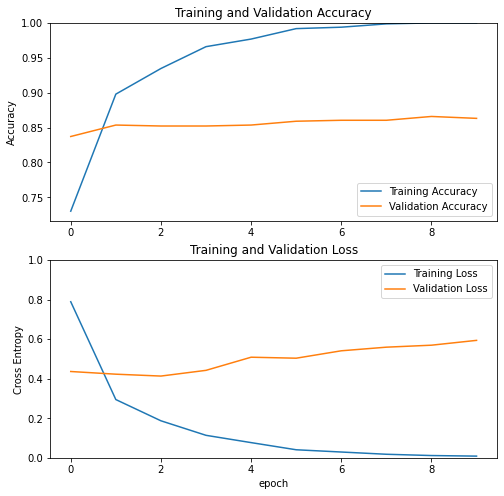

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
print('Number of layers in the base model : ', len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model :  155


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 2,626,821
Trainable params: 2,231,429
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [ ]:
history_fine_tune =model.fit_generator(
    train_gen,
    epochs=5,
    validation_data = val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/5
46/46 [==============================] - 259s 6s/step - loss: 0.3485 - accuracy: 0.8864 - val_loss: 0.5968 - val_accuracy: 0.8687
Epoch 2/5
46/46 [==============================] - 251s 5s/step - loss: 0.1883 - accuracy: 0.9289 - val_loss: 0.6102 - val_accuracy: 0.8618
Epoch 3/5
46/46 [==============================] - 263s 6s/step - loss: 0.1330 - accuracy: 0.9524 - val_loss: 0.6097 - val_accuracy: 0.8646
Epoch 4/5
46/46 [==============================] - 256s 6s/step - loss: 0.0946 - accuracy: 0.9633 - val_loss: 0.6090 - val_accuracy: 0.8632
Epoch 5/5
46/46 [==============================] - 245s 5s/step - loss: 0.0647 - accuracy: 0.9782 - val_loss: 0.6005 - val_accuracy: 0.8673


In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model,saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite','wb') as f:
  f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

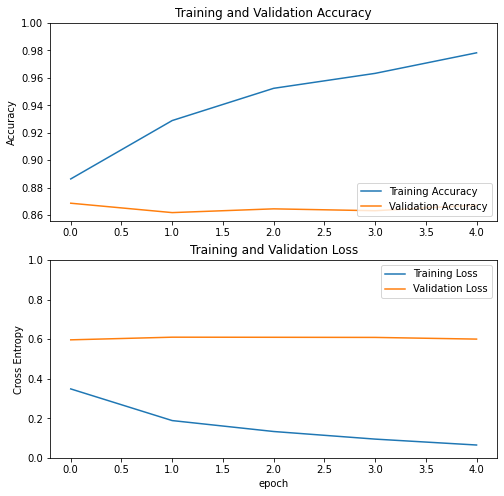

In [ ]:
acc = history_fine_tune.history['accuracy']
val_acc = history_fine_tune.history['val_accuracy']

loss = history_fine_tune.history['loss']
val_loss = history_fine_tune.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [1]:
print("Model Completed!")

Model Completed!
